In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
file_path = 'housing.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


In [12]:
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [14]:
data.dropna(inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [16]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

X = data.drop(['median_house_value'],axis=1)
Y = data['median_house_value']

In [17]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [18]:
Y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20433, dtype: int64

In [19]:
X_train ,X_test , Y_train , Y_test  = train_test_split(X,Y,test_size=0.2)

In [20]:
train_data = X_train.join(Y_train)

In [21]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20573,-122.05,38.56,20,1005,168.0,457,157,5.6790,INLAND,225000
10410,-117.59,33.65,2,4860,1193.0,2332,1073,4.5022,<1H OCEAN,151900
17729,-121.79,37.32,20,3034,451.0,1669,430,6.2742,<1H OCEAN,241300
14055,-117.13,32.75,23,3999,1182.0,2051,1130,2.1292,NEAR OCEAN,135000
8601,-118.37,33.88,27,1688,331.0,811,327,4.5357,<1H OCEAN,334200
...,...,...,...,...,...,...,...,...,...,...
3626,-118.43,34.24,35,1488,293.0,1112,288,4.4688,<1H OCEAN,182500
11846,-120.57,39.78,15,1291,283.0,582,242,2.1216,INLAND,102000
12265,-116.88,33.74,20,3111,623.0,1000,508,1.5982,INLAND,140000
6102,-117.89,34.11,36,806,147.0,446,153,4.5221,<1H OCEAN,151300


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

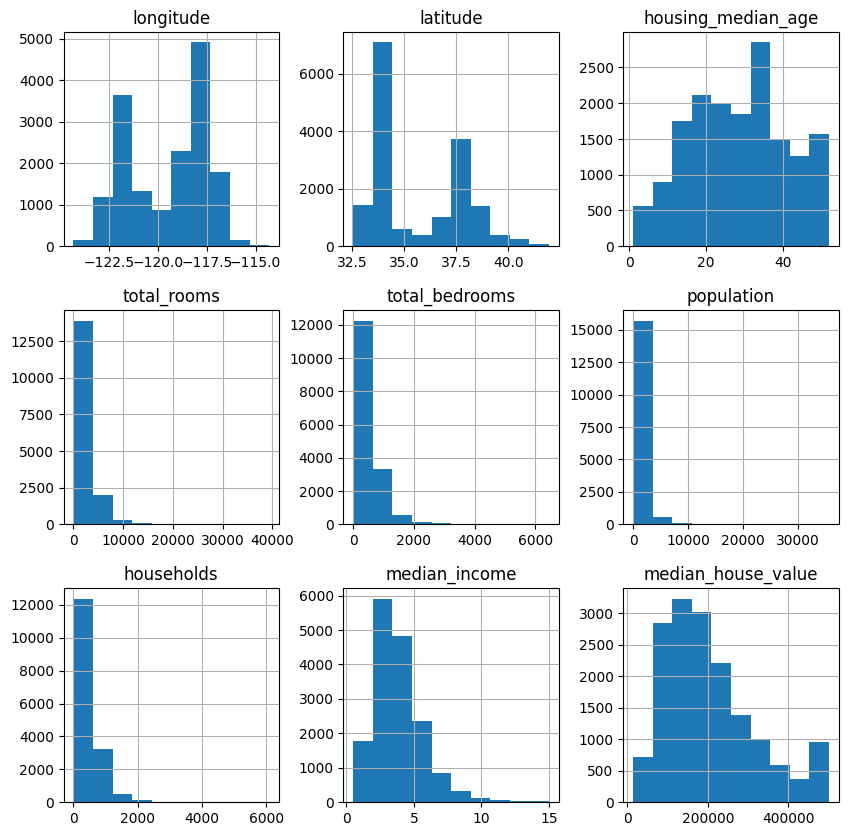

In [22]:
train_data.hist(figsize=(10,10))

In [25]:

for col in train_data.columns:
    if train_data[col].dtype == 'object':
        try:
            train_data[col] = pd.to_numeric(train_data[col], errors='coerce')

        except:
            pass
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924237,-0.106630,0.042228,0.069385,0.099702,0.056432,-0.023011,NaN,-0.050603
latitude,-0.924237,1.000000,0.008849,-0.034711,-0.067608,-0.109911,-0.072798,-0.074752,NaN,-0.140917
housing_median_age,-0.106630,0.008849,1.000000,-0.357088,-0.317773,-0.290847,-0.299406,-0.111442,NaN,0.110529
total_rooms,0.042228,-0.034711,-0.357088,1.000000,0.929631,0.855046,0.919240,0.196128,NaN,0.133475
total_bedrooms,0.069385,-0.067608,-0.317773,0.929631,1.000000,0.874947,0.980690,-0.009516,NaN,0.048495
population,0.099702,-0.109911,-0.290847,0.855046,0.874947,1.000000,0.903551,0.005109,NaN,-0.025052
households,0.056432,-0.072798,-0.299406,0.919240,0.980690,0.903551,1.000000,0.012374,NaN,0.063996
median_income,-0.023011,-0.074752,-0.111442,0.196128,-0.009516,0.005109,0.012374,1.000000,NaN,0.690564
ocean_proximity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_house_value,-0.050603,-0.140917,0.110529,0.133475,0.048495,-0.025052,0.063996,0.690564,NaN,1.000000


<Axes: >

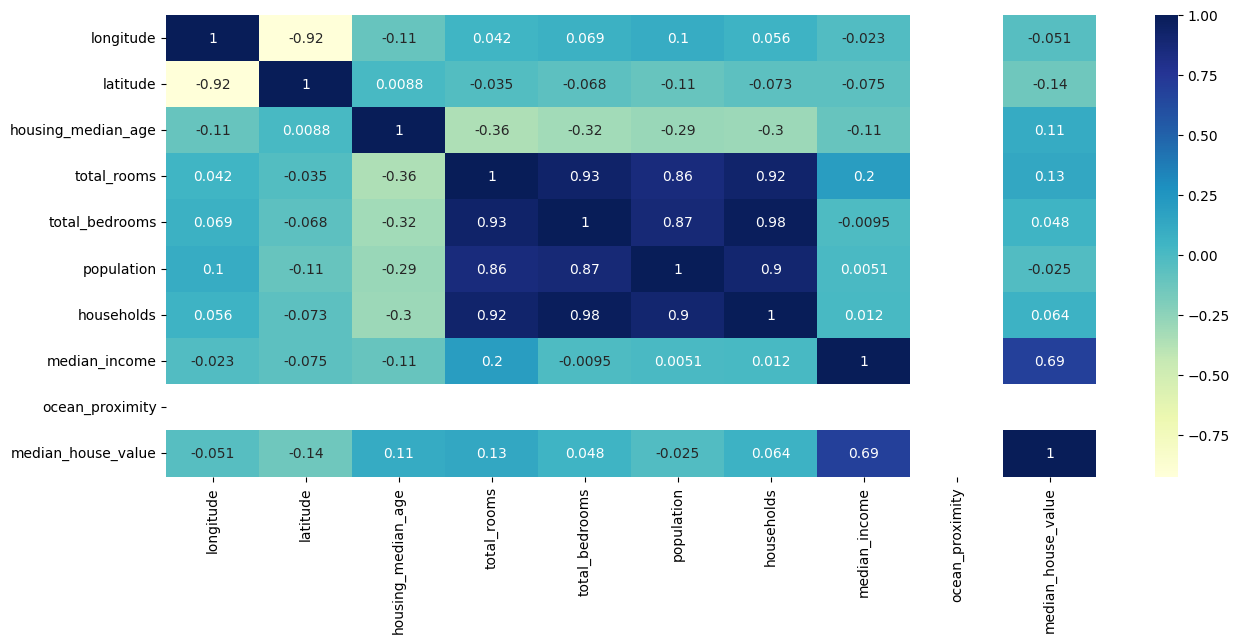

In [26]:
plt.figure(figsize=(15,6))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [27]:
train_data['total_rooms'] =np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] =np.log(train_data['total_rooms'] + 1)
train_data['population'] =np.log(train_data['total_rooms'] + 1)
train_data['households'] =np.log(train_data['total_rooms'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

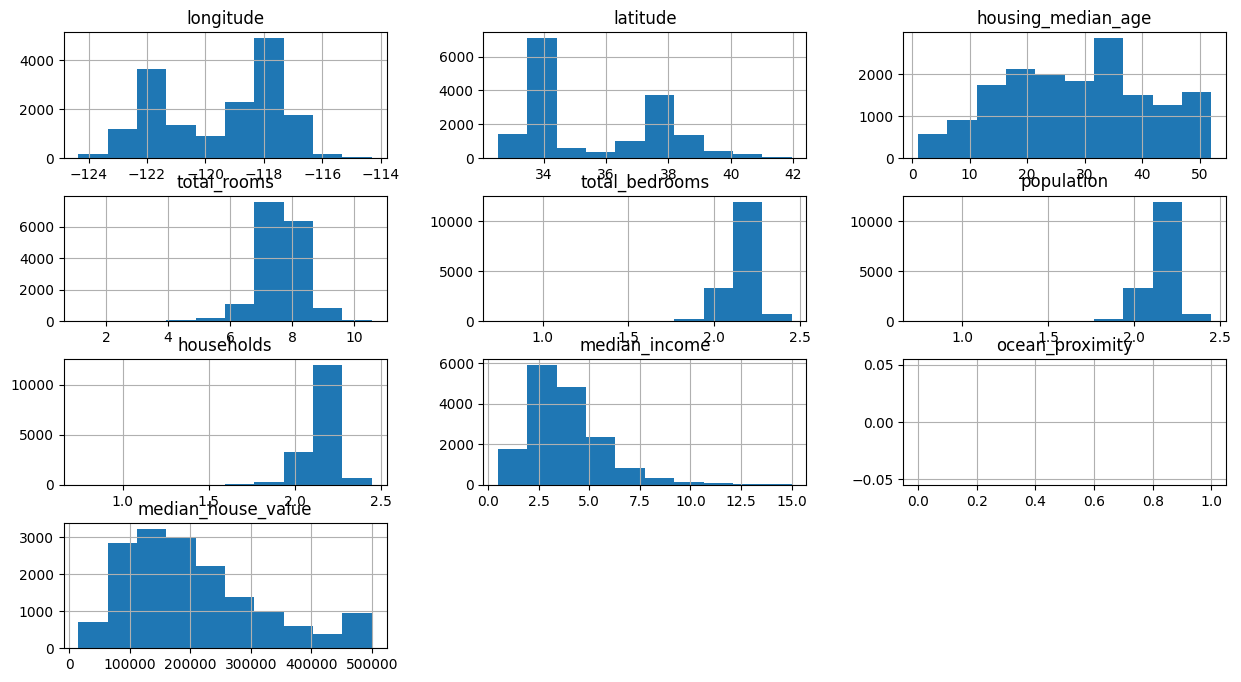

In [28]:
train_data.hist(figsize=(15,8))

In [29]:
train_data.ocean_proximity.value_counts()

Series([], Name: count, dtype: int64)

In [30]:
train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20573,-122.05,38.56,20,6.913737,2.068600,2.068600,2.068600,5.6790,225000
10410,-117.59,33.65,2,8.488999,2.250133,2.250133,2.250133,4.5022,151900
17729,-121.79,37.32,20,8.017967,2.199219,2.199219,2.199219,6.2742,241300
14055,-117.13,32.75,23,8.294050,2.229374,2.229374,2.229374,2.1292,135000
8601,-118.37,33.88,27,7.431892,2.132021,2.132021,2.132021,4.5357,334200
...,...,...,...,...,...,...,...,...,...
3626,-118.43,34.24,35,7.305860,2.116961,2.116961,2.116961,4.4688,182500
11846,-120.57,39.78,15,7.163947,2.099728,2.099728,2.099728,2.1216,102000
12265,-116.88,33.74,20,8.043021,2.201993,2.201993,2.201993,1.5982,140000
6102,-117.89,34.11,36,6.693324,2.040353,2.040353,2.040353,4.5221,151300


In [31]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20573,-122.05,38.56,20,6.913737,2.068600,2.068600,2.068600,5.6790,NaN,225000
10410,-117.59,33.65,2,8.488999,2.250133,2.250133,2.250133,4.5022,NaN,151900
17729,-121.79,37.32,20,8.017967,2.199219,2.199219,2.199219,6.2742,NaN,241300
14055,-117.13,32.75,23,8.294050,2.229374,2.229374,2.229374,2.1292,NaN,135000
8601,-118.37,33.88,27,7.431892,2.132021,2.132021,2.132021,4.5357,NaN,334200
...,...,...,...,...,...,...,...,...,...,...
3626,-118.43,34.24,35,7.305860,2.116961,2.116961,2.116961,4.4688,NaN,182500
11846,-120.57,39.78,15,7.163947,2.099728,2.099728,2.099728,2.1216,NaN,102000
12265,-116.88,33.74,20,8.043021,2.201993,2.201993,2.201993,1.5982,NaN,140000
6102,-117.89,34.11,36,6.693324,2.040353,2.040353,2.040353,4.5221,NaN,151300


<Axes: >

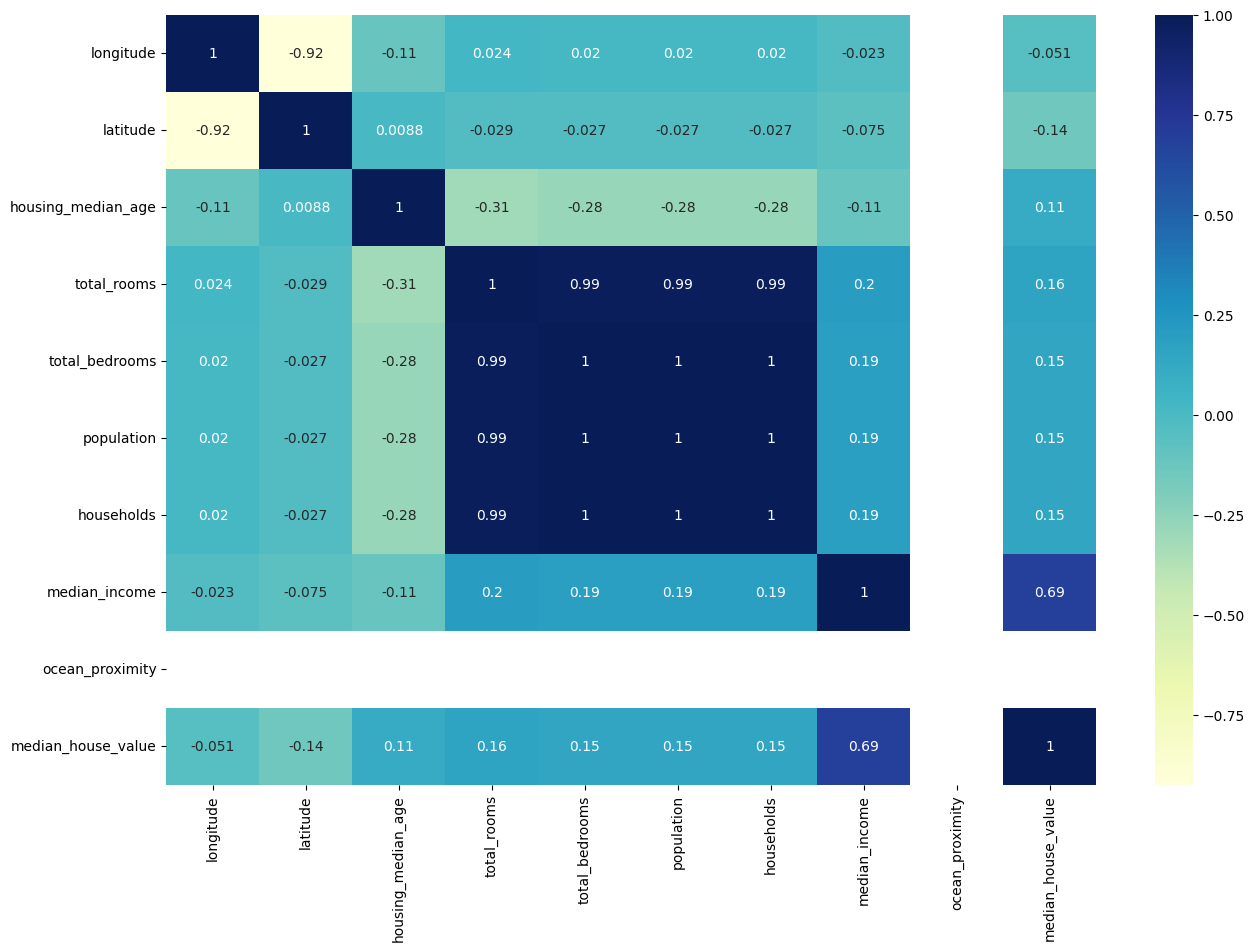

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

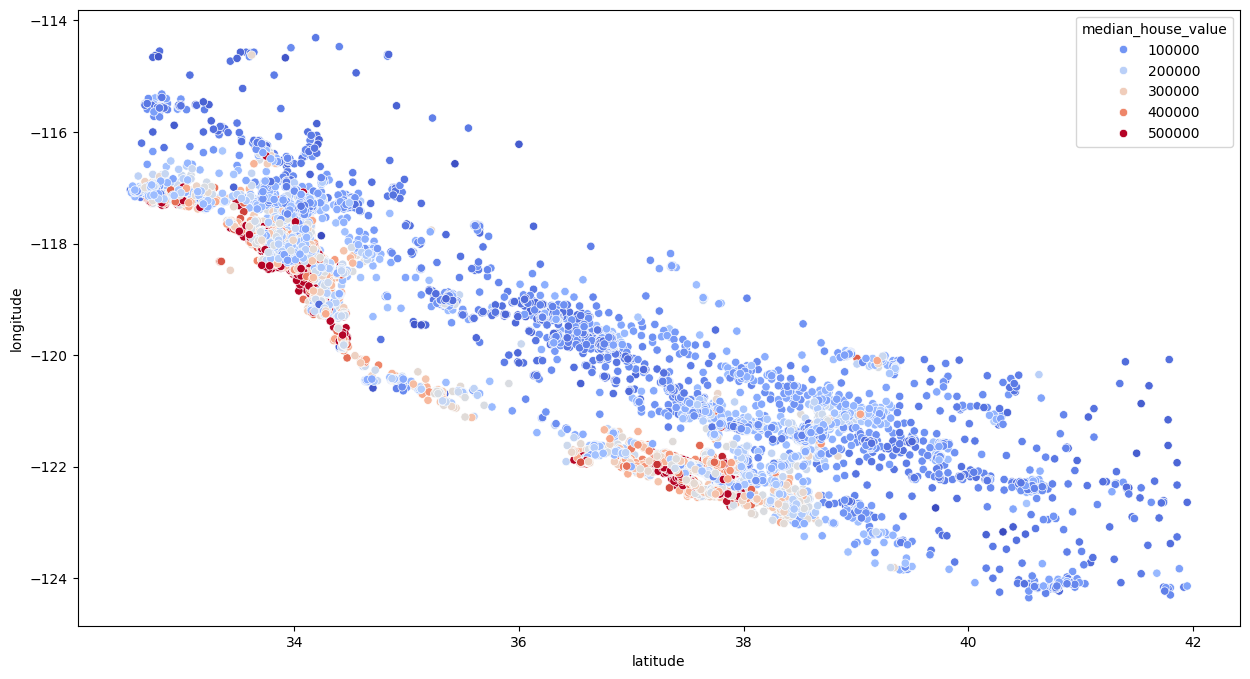

In [33]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y ='longitude',data=train_data, hue="median_house_value",palette = "coolwarm")

In [34]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


In [35]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

<Axes: >

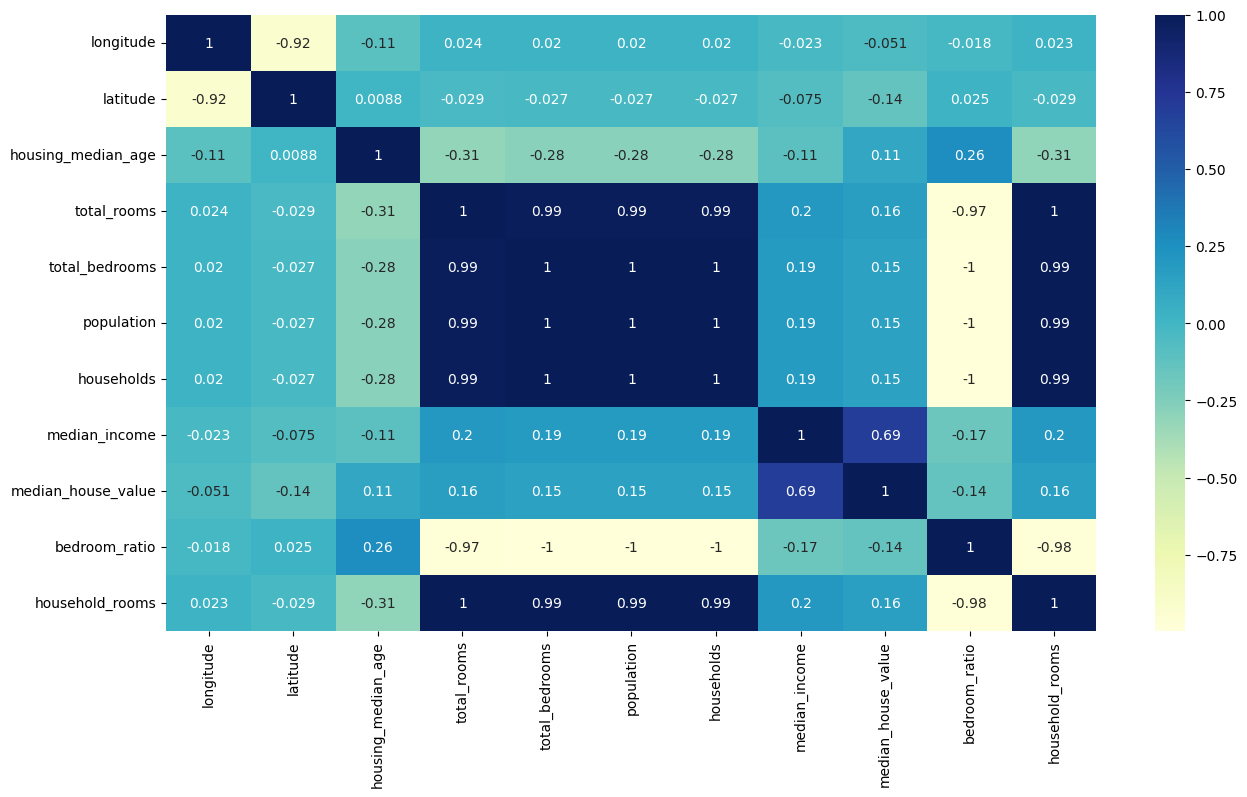

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')


In [37]:
from sklearn.linear_model import LinearRegression
X_train , Y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train,Y_train)

LinearRegression()

In [38]:
test_data = X_test.join(Y_test)
test_data['total_rooms'] =np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] =np.log(test_data['total_rooms'] + 1)
test_data['population'] =np.log(test_data['total_rooms'] + 1)
test_data['households'] =np.log(test_data['total_rooms'] + 1)
test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [39]:
X_test , Y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']


reg.fit(X_test,Y_test)


LinearRegression()

In [40]:
reg.score(X_test,Y_test)

0.6083805427952212

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,Y_train)

RandomForestRegressor()

In [42]:
forest.score(X_train,Y_train)

0.9740679625104207

In [43]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
}

grid_search = GridSearchCV(forest , param_grid , cv=5, scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
best_forest = grid_search.best_estimator_


In [45]:
best_forest.score(X_train , Y_train)



0.9715148605423134